In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from scipy.optimize import minimize
%matplotlib inline

In [2]:
dataset = pd.read_csv("ex2data1.txt",header = None)
X = np.c_[np.ones((dataset.shape[0],1)),dataset.iloc[:,0:dataset.shape[1]-1]]
y = np.c_[dataset.iloc[:,dataset.shape[1]-1]]

In [3]:
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [40]:
def sigmoid_f(X,theta):
    return(1 / (1 + np.exp(-(X.dot(theta)))))

In [41]:
def hypothesis(X,theta):
    return sigmoid_f(X,theta)

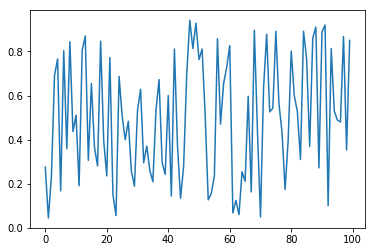

In [6]:
initial_theta = np.ones((X.shape[1],1))
h = hypothesis_f(X,initial_theta)
plt.plot(h)
plt.show()

## Linear way try

In [7]:
def cost_fun_linear(X,y,theta):
    h = hypothesis(X,theta)
    m = y.size
    J = (1/(2*m))*np.sum(np.square((h - y)))
    return J

In [8]:
def gradient_desc_linear(h, y, X, alpha,theta,iteration = 1500):
    m = y.size
    J_iter = np.zeros(iteration)
    for it in range(iteration):
        h = hypothesis(X,theta)
        theta = theta - alpha*(1/(m))*(X.T.dot(h-y))
        J_iter[it] = cost_fun_linear(X,y,theta)
    return (theta,J_iter)

In [9]:
initial_theta = np.ones((X.shape[1],1))
h = hypothesis(X,initial_theta)
theta,J_history = gradient_desc_linear(h,y,X,0.01,initial_theta)

[1.         1.78534504 1.58915021]


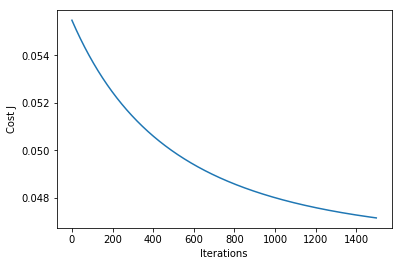

In [10]:
# Obtained
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
print(theta.ravel())

In [11]:
pred = hypothesis(X,theta.ravel())>0.5
print(pred[:5])
print(confusion_matrix(y,pred))
print(accuracy_score(y,pred))

[False False False  True  True]
[[38  2]
 [11 49]]
0.87


## Logistic Regression

In [12]:
def cost_function_logistic(X,y,theta):
    h = hypothesis(X,theta)
    m = y.size
    return -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))

In [13]:
def gradient_desc_logistic(y, X, alpha,theta,iteration = 1500):
    m = y.size
    J_iter = np.zeros(iteration)
    for it in range(iteration):
        h = hypothesis(X,theta)
        theta = theta - alpha*(1/(m))*(X.T.dot(h-y))
        J_iter[it] = cost_function_logistic(X,y,theta)
    return (theta,J_iter)

In [14]:
initial_theta = np.zeros((X.shape[1],1))
h = hypothesis(X,initial_theta)
theta,J_history = gradient_desc_logistic(y,X,0.1,initial_theta)

## Optimised Cost

In [15]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [16]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [28]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [30]:
cost = costFunction(initial_theta,X, y)
grad = gradient(initial_theta,X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [0.69314718]
Grad: 
 [ 0.         -0.28122914 -0.25098615]


In [31]:
res = minimize(costFunction,initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
res

      fun: 0.279427981040403
 hess_inv: array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        , 24.01891613, 16.13220127],
       [ 0.        , 16.13220127, 22.0403848 ]])
      jac: array([0.00000000e+00, 5.91759127e-06, 2.87319660e-06])
  message: 'Optimization terminated successfully.'
     nfev: 13
      nit: 12
     njev: 13
   status: 0
  success: True
        x: array([0.        , 2.82062993, 2.50746799])

In [43]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [44]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 87.0%


In [42]:
predict_fmin = hypothesis(X,res.x.T)>0.5
confusion_matrix(y,predict_fmin)
accuracy_score(y,predict_fmin)

0.87

In [46]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

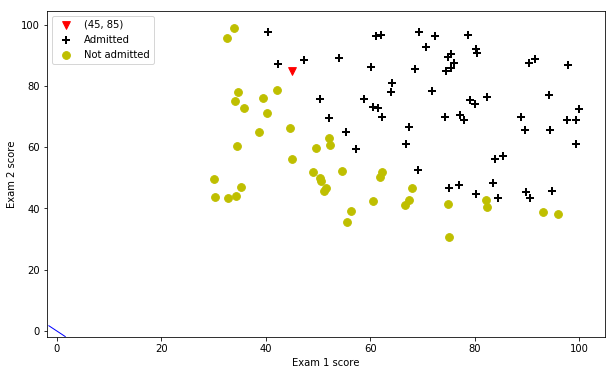

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(dataset.iloc[:].values, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

In [ ]:
X_model = dataset.iloc[:,0:dataset.shape[1]-1].values
y_model = dataset.iloc[:,dataset.shape[1]-1].values
LR = LogisticRegression(solver='lbfgs')
model = LR.fit(X_model,y_model)
predict_model = model.predict(X_model)

In [ ]:
print(confusion_matrix(y,predict_model))
print(accuracy_score(y,predict_model))

In [ ]:
model.score(X_model,y_model)

In [51]:
import re
std = 'me56'
re.findall('\d',std)

['5', '6']